# <center> <div class="alert alert-block alert-info">  <span style="color:crimson;"> Rain Prediction ☔ </center>

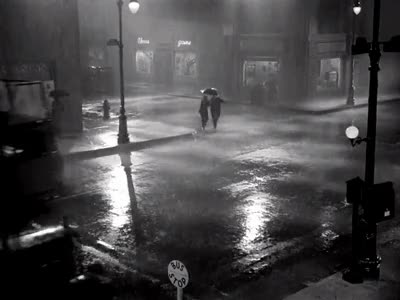

# <center> <div class="alert alert-block alert-info">  <span style="color:crimson;"> Data Description 🧾 </center>
* **Date:** The date of observation
* **Location:** The common name of the location of the weather station
* **Temprature:** The (maximum & Minimum) temperature in degrees celsius
* **Rainfall:** The amount of rainfall recorded for the day in mm
* **Evaporation:** The so-called Class A pan evaporation (mm) in the 24 hours to 9am
* **Sunshine:** The number of hours of bright sunshine in the day
* **WindGustDir:** The direction of the strongest wind gust in the 24 hours to midnight
* **WindGustSpeed:**The speed (km/h) of the strongest wind gust in the 24 hours to midnight
* **WindDir9am:** Direction of the wind at 9am
* **WindDir3pm:** Direction of the wind at 3pm
* **WindSpeed9am:** Wind speed (km/hr) averaged over 10 minutes prior to 9am
* **WindSpeed3pm:** Wind speed (km/hr) averaged over 10 minutes prior to 3pm
* **Humidity9am:** Humidity (percent) at 9am
* **Humidity3pm:** Humidity (percent) at 3pm
* **Pressure9am:** Atmospheric pressure (hpa) reduced to mean sea level at 9am
* **Pressure3pm:** Atmospheric pressure (hpa) reduced to mean sea level at 3pm
* **Cloud9am:** Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many
* **Cloud3pm:** Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values
* **Temp9am:** Temperature (degrees C) at 9am
* **Temp3pm:** Temperature (degrees C) at 3pm
* **RainToday:** Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
* **RainTomorrow:** The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk"


## Libraries📚

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import cufflinks as cf
from scipy import stats
import plotly.express as px
import matplotlib.pyplot as plt

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [ ]:
# Read the csv file using pandas  !  
df = pd.read_csv('../input/weather-dataset-rattle-package/weatherAUS.csv')
df.head(n=5)

In [ ]:
df.shape

# Descriptive Statistics 📊📉

In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

In [ ]:
df.duplicated().sum()


In [ ]:
df.drop_duplicates()

# <center> <div class="alert alert-block alert-info">  <span style="color:crimson;"> Exploratory Data Analysis </center>

In [ ]:
# check the null values ! 
print("Q: Are there any missing values?", "\n" +
      "A: {}".format(df.isnull().values.any()))

In [ ]:
# using heatmap we can also vizualize the null values !
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),cmap='winter',yticklabels=False,cbar=False)
plt.show()

<h1 style='color:red;> Data Cleaning 🧹 </h1>

# Data Cleaning ..🧹 

In [ ]:
df.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm','Date'],axis=1,inplace=True)

Filling numerical empty column with median value of that row and for categorical filling empty values with its corresponding previous value

In [ ]:
# Filling null values

def fill_na(info):
    cols=info.columns
    for col in cols:
        if info[col].dtype=='object':
            info[col].fillna(method='ffill',inplace=True)
        else:
            info[col].fillna(info[col].median(),inplace=True)
    return info

In [ ]:
df1=fill_na(df)

In [ ]:
# Now check the null values using heatmap ! 
plt.figure(figsize=(10,6))
sns.heatmap(df1.isnull(),cmap='winter',yticklabels=False,cbar=False)
plt.show()

In [ ]:
df1.head(n=5)

In [ ]:
df1.shape

# Data Visualization

In [ ]:
plt.figure(figsize=(25,30))
plt.subplot(5,2,1)
sns.histplot(df1,x='MinTemp')
plt.subplot(5,2,2)
sns.histplot(df1,x='MaxTemp')
plt.subplot(5,2,3)
sns.histplot(df1,x='WindGustSpeed')
plt.subplot(5,2,4)
sns.histplot(df1,x='WindSpeed3pm')
plt.subplot(5,2,5)
sns.histplot(df1,x='Humidity9am')
plt.subplot(5,2,6)
sns.histplot(df1,x='Humidity3pm')
plt.subplot(5,2,7)
sns.histplot(df1,x='Pressure9am')
plt.subplot(5,2,8)
sns.histplot(df1,x='Pressure3pm')
plt.subplot(5,2,9)
sns.histplot(df1,x='Temp9am')
plt.subplot(5,2,10)
sns.histplot(df1,x='Temp3pm')
plt.show()

In [ ]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=df1, x="Location", y="MinTemp", hue="WindGustDir")
plt.show()

In [ ]:
df1.head(n=5)

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']
df1[cols] = df1[cols].apply(LabelEncoder().fit_transform)
df1.head(n=5)

In [ ]:
plt.figure(figsize=(25,20))
plt.subplot(3,2,1)
sns.countplot(data = df1,x = df1['Location'])
plt.subplot(3,2,2)
sns.countplot(data = df1,x=df1['WindGustDir'])
plt.subplot(3,2,3)
sns.countplot(data = df1,x=df1['WindDir9am'])
plt.subplot(3,2,4)
sns.countplot(data = df1,x = df1['WindDir3pm'])
plt.subplot(3,2,5)
sns.countplot(data = df1,x=df1['RainToday'])
plt.subplot(3,2,6)
sns.countplot(data = df1,x=df1['RainTomorrow'])
plt.show()

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot=True,cmap='coolwarm')
plt.show()

# Outliers removal

In [ ]:
plt.figure(figsize=(30,40))
for i,col in enumerate(df1.columns,1):
    plt.subplot(15,2,i)
    sns.boxplot(data=df1,x=col, orient="h")
plt.show()

In [ ]:
plt.figure(figsize=(30,40))
for i,column in enumerate(df1.columns,1):
    plt.subplot(15,2,i)
    sns.violinplot(data = df1,x = df1[column],orient = 'h')
plt.show()

In [ ]:
zscore = np.abs(stats.zscore(df1))
print(zscore)

In [ ]:
print(np.where(zscore > 3))

In [ ]:
df2 = df1[(zscore<3).all(axis=1)]

In [ ]:
df1.shape,df2.shape

Removing high Colinearity 
* MinTemp-Temp9am-90%
* MinTemp-MaxTemp-73%
* MinTemp-Temp3pm-70%
* MaxTemp-Temp3pm-97%

In [ ]:
x = df2.drop(['RainToday','RainTomorrow','Temp3pm','Temp9am'],axis=True)
y = df2['RainTomorrow']

In [ ]:
x = x.values
y = y.values

In [ ]:
split = int(0.9*x.shape[0])
print(split)

x_train = x[:split,:]
y_train = y[:split]

x_test = x[split:,:]
y_test = y[split:]

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

The Euclidean distance’s : ->




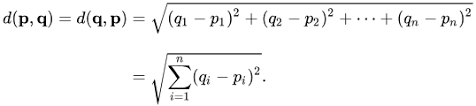

In [ ]:
def distance(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(x,y,querypoint,k=5):
    vals = []
    m = x.shape[0]
    
    for i in range(m):
        d = distance(querypoint,x[i])
        vals.append((d,y[i]))
        
    vals = sorted(vals)
    #nearest/first k points
    vals = np.array(vals)
    
    #print(vals)
    
    new_vals = np.unique(vals[:,1],return_counts=True)
    #print(new_vals)
    
    index = new_vals[1].argmax()
    #print(index)
    pred = new_vals[0][index]
    
    return pred

In [ ]:
pred = knn(x_train,y_train,x_test[0])
print(int(pred))

In [ ]:
# Calculate accuracy percentage between two lists
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
k_clf = KNeighborsClassifier()
k_clf.fit(x_train,y_train)

k_acc = accuracy_score(y_test,k_clf.predict(x_test))

print("Train Set Accuracy:"+str(accuracy_metric(y_train,k_clf.predict(x_train))))
print("Test Set Accuracy:"+str(accuracy_metric(y_test,k_clf.predict(x_test))))